In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%reload_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import pandas as pd
from pathlib import Path

from src.data.import_census_datasets import get_census_1991_to_2016_pictou_county

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_path = Path("../../data")  # points to the notebook folder
processed_path = data_path / "processed"

In [3]:
df = pd.read_pickle(processed_path / "census_1991_to_2016_pictou_county.pickle")
len(df)
df.dtypes
df.columns

583

Age            int64
Female       float64
Male         float64
Total        float64
Year           int64
AgeGroup    category
dtype: object

Index(['Age', 'Female', 'Male', 'Total', 'Year', 'AgeGroup'], dtype='object')

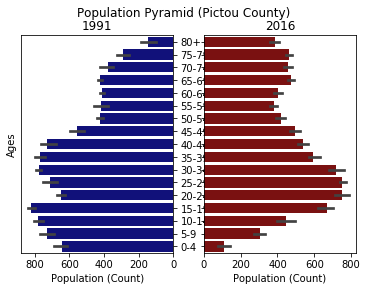

In [4]:
fig, axes = plt.subplots(ncols=2, sharey=True)

left_year = 1991
right_year = 2016

sns.barplot(
    x="Total",
    y="AgeGroup",
    color="darkblue",
    ax=axes[0],
    data=df[df.Year == left_year],
)
sns.barplot(
    x="Total",
    y="AgeGroup",
    color="darkred",
    ax=axes[1],
    data=df[df.Year == right_year],
)

axes[0].invert_xaxis()
axes[0].yaxis.tick_right()
axes[0].set_title(left_year)
axes[1].set_title(right_year)
axes[0].set(xlabel="Population (Count)", ylabel="Ages")
axes[1].set(xlabel="Population (Count)", ylabel="")
fig.suptitle("Population Pyramid (Pictou County)")

plt.show();